In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df = pd.read_csv("train_data.csv")
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [6]:
# removing the duplicate records

dups_before = df.duplicated().sum()
df = df.drop_duplicates()
dups_after = df.duplicated().sum()

print("Before: {}".format(dups_before))
print("After: {}".format(dups_after))

Before: 2629
After: 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5180
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [8]:
# changing datatype of few variables (convenient for analysis)

df["Attrition"] = df["Attrition"].astype("category")
df["Involvement"] = df["Involvement"].astype("category")
df["WorkLifeBalance"] = df["WorkLifeBalance"].astype("category")
df["JobSatisfaction"] = df["JobSatisfaction"].astype("category")
df["OverTime"] = df["OverTime"].astype("category")
df["ESOPs"] = df["ESOPs"].astype("category")

In [9]:
# numerical and categorical

num = df.select_dtypes(include=["float","int"]).columns
cat = df.select_dtypes(include=["object","category"]).columns

In [10]:
# summary of numerical column

df[num[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4864.0,37.108553,9.248647,18.0,30.0,36.0,43.0,61.0
HomeToWork,4925.0,11.107411,8.455577,1.0,5.0,9.0,16.0,121.0
HourlnWeek,4893.0,57.979767,12.996674,10.0,49.0,59.0,67.0,99.0
NumCompaniesWorked,5180.0,3.157336,2.606036,0.0,1.0,2.0,5.0,21.0
SalaryHikelastYear,5011.0,20.649371,3.706469,16.0,18.0,20.0,23.0,31.0
WorkExperience,4993.0,11.165832,7.797783,0.0,6.0,9.0,15.0,41.0
LastPromotion,5110.0,2.552838,3.234467,0.0,1.0,1.0,3.0,16.0
CurrentProfile,4869.0,4.385295,3.617643,0.0,2.0,3.0,7.0,18.0
MonthlyIncome,5087.0,21692.296442,4770.637922,1000.0,18362.0,20160.0,23443.5,95000.0


In [11]:
# distribution of numerical variables

col = num[1:]
# plt.figure(figsize=(12,9))

# for i in range(len(col)):
#     plt.subplot(3,3,i+1)
#     sns.histplot(train_df[col[i]], bins=20)
#     plt.tight_layout()

In [12]:
# checking the salary hike last year column more closely

# plt.figure(figsize=(8,5))
# sns.histplot(train_df["SalaryHikelastYear"],bins=25)
# plt.xticks(np.arange(16,31,1))
# plt.show()

In [13]:
# checking boxplots

# col = num[1:]
# plt.figure(figsize=(14,6))

# for i in range(len(col)):
#     plt.subplot(2,5,i+1)
#     sns.boxplot(y=train_df[col[i]])
#     plt.tight_layout()

In [14]:
# checking the pairplot

data = df[col]
# sns.pairplot(data, diag_kind='kde');

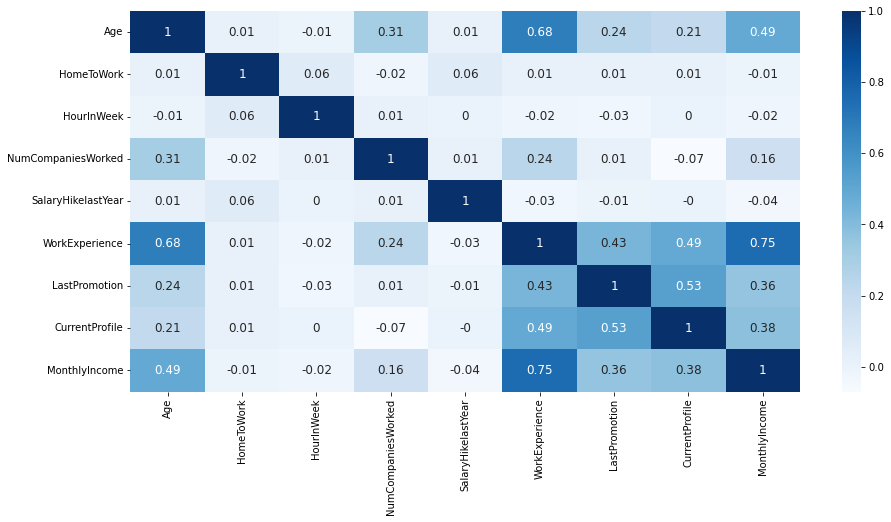

In [15]:
# checking the correlation heatmap

data = df[col]
correlation = np.round(data.corr(),2)

plt.figure(figsize=(15,7))
sns.heatmap(correlation, annot=True,  annot_kws={"size":12}, cmap="Blues")
plt.show()

In [16]:
# checking the object variables

for i in cat:
    print("No.of.categories: {}".format(df[i].nunique()))
    print("")
    print(df[i].value_counts())
    print("---------------------------------")
    print("")

No.of.categories: 2

0.0    3735
1.0    1445
Name: Attrition, dtype: int64
---------------------------------

No.of.categories: 3

Rarely    3637
Yes       1051
No         492
Name: TravelProfile, dtype: int64
---------------------------------

No.of.categories: 3

Analytics    3219
Sales        1615
Marketing     222
Name: Department, dtype: int64
---------------------------------

No.of.categories: 6

Statistics           2129
CA                   1560
Marketing Diploma     603
Engineer              487
Other                 284
MBA                   117
Name: EducationField, dtype: int64
---------------------------------

No.of.categories: 3

Male      3094
Female    1338
F          702
Name: Gender, dtype: int64
---------------------------------

No.of.categories: 5

3.0    3030
4.0    1355
1.0     361
5.0     325
2.0     109
Name: Involvement, dtype: int64
---------------------------------

No.of.categories: 5

4.0    1060
3.0    1054
5.0    1033
1.0    1027
2.0    1006
Name: Work

In [17]:
# combining married and m categories (both are same)
df["MaritalStatus"] = df["MaritalStatus"].replace("M","Married")

# combining female and f categories (both are same)
df["Gender"] = df["Gender"].replace("F","Female")

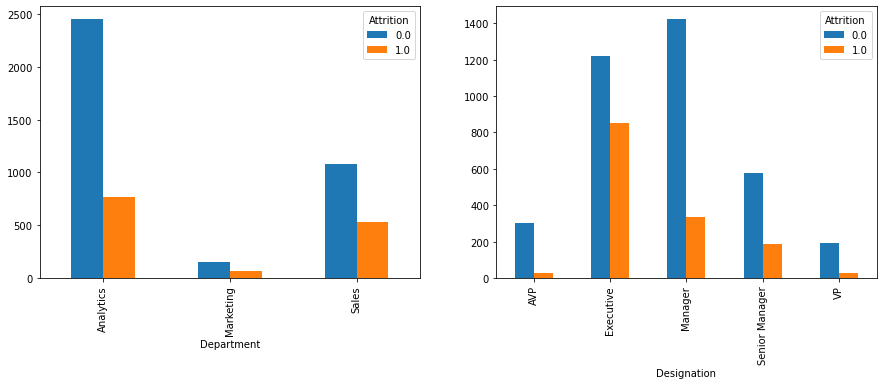

In [18]:
# crosstab 01---------------------------------
ctb_dpt = pd.crosstab(df["Department"], df["Attrition"])

# crosstab 02---------------------------------
ctb_dgn = pd.crosstab(df["Designation"], df["Attrition"])

fig, ax = plt.subplots(1,2,figsize=(15,5))
ctb_dpt.plot(kind="bar", ax=ax[0])
ctb_dgn.plot(kind="bar", ax=ax[1])
plt.show()

### Treating bad data , outliers and missing values

In [19]:
# dropping the last record as it has missing values in all variables

df = df.drop(5180, axis=0)

In [20]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [21]:
# let's seperate the variables again

cols = df.isnull().sum()[df.isnull().sum()>0].index

miss_num = df[cols].select_dtypes(exclude=["object","category"]).columns
miss_cat = df[cols].select_dtypes(include=["object","category"]).columns

In [22]:
# replacing nan with median values

for i in miss_num:
    df[i] = df[i].replace(np.nan, df[i].median())

In [23]:
# replacing nan with mode values

for i in miss_cat:
    df[i] = df[i].replace(np.nan, df[i].mode()[0])

In [24]:
# # let's take imputers for categorical and numerical columns seperately

# cat_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
# num_imputer = SimpleImputer(missing_values=np.nan, strategy="median")

# # imputing the median and mode values

# train_df[miss_cat] = cat_imputer.fit_transform(train_df[miss_cat])
# train_df[miss_num] = num_imputer.fit_transform(train_df[miss_num])

In [25]:
df.isnull().sum()

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [26]:
# Finding the upper and lower bound values

def finding_range(x):
    xs = pd.Series(sorted(x))
    Q3 = xs.quantile(q=0.75)
    Q1 = xs.quantile(q=0.25)
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [27]:
outliers = num[1:]

for i in outliers:
    lr,ur = finding_range(df[i])
    print("Variable: {}".format(i))
    print("")
    print("Upper Bound Value: {}".format(round(ur,2)))
    print("Lower Bound Value: {}".format(round(lr,2)))
    print("\n")

Variable: Age

Upper Bound Value: 58.5
Lower Bound Value: 14.5


Variable: HomeToWork

Upper Bound Value: 30.0
Lower Bound Value: -10.0


Variable: HourlnWeek

Upper Bound Value: 92.5
Lower Bound Value: 24.5


Variable: NumCompaniesWorked

Upper Bound Value: 11.0
Lower Bound Value: -5.0


Variable: SalaryHikelastYear

Upper Bound Value: 30.5
Lower Bound Value: 10.5


Variable: WorkExperience

Upper Bound Value: 28.5
Lower Bound Value: -7.5


Variable: LastPromotion

Upper Bound Value: 6.0
Lower Bound Value: -2.0


Variable: CurrentProfile

Upper Bound Value: 14.5
Lower Bound Value: -5.5


Variable: MonthlyIncome

Upper Bound Value: 30799.5
Lower Bound Value: 10923.5




In [28]:
# boxplots for replacement reference

# col = num[1:]
# plt.figure(figsize=(14,6))

# for i in range(len(col)):
#     plt.subplot(2,5,i+1)
#     sns.boxplot(y=df[col[i]])
#     plt.tight_layout()

In [29]:
# replacing the outlier values

# Age variable------------------------------------------(using corporate logic)
df["Age"] = np.where(df["Age"]>60, 60, df["Age"])

# HomeToWOrk variable-----------------------------------(using second high distance)
df["HomeToWork"] = np.where(df["HomeToWork"]>50, 36, df["HomeToWork"]) 

# HourlnWeek variable-----------------------------------
df["HourlnWeek"] = np.where(df["HourlnWeek"]>92.5, 92.5, df["HourlnWeek"])
df["HourlnWeek"] = np.where(df["HourlnWeek"]<24.5, 24.5, df["HourlnWeek"])

# NumCompaniesWorked variable---------------------------
df["NumCompaniesWorked"] = np.where(df["NumCompaniesWorked"]>11, 11, df["NumCompaniesWorked"])

# SalaryHikelastYear variable---------------------------
df["SalaryHikelastYear"] = np.where(df["SalaryHikelastYear"]>30.5, 30.5, df["SalaryHikelastYear"])

# WorkExperience variable-------------------------------(using real world logic)
df["WorkExperience"] = np.where(df["WorkExperience"]>35,35, df["WorkExperience"])

# LastPromotion variable--------------------------------(keep as it is)
# df["LastPromotion"] = np.where(df["LastPromotion"]>6, 6, df["LastPromotion"])

# CurrentProfile variable-------------------------------(keep as it is)
# df["CurrentProfile"] = np.where(df["CurrentProfile"]>14.5, 14.5, df["CurrentProfile"])

# MonthlyIncome variable--------------------------------
df["MonthlyIncome"] = np.where(df["MonthlyIncome"]>40000, 30799.5, df["MonthlyIncome"])
df["MonthlyIncome"] = np.where(df["MonthlyIncome"]<10923.5, 10923.5, df["MonthlyIncome"])

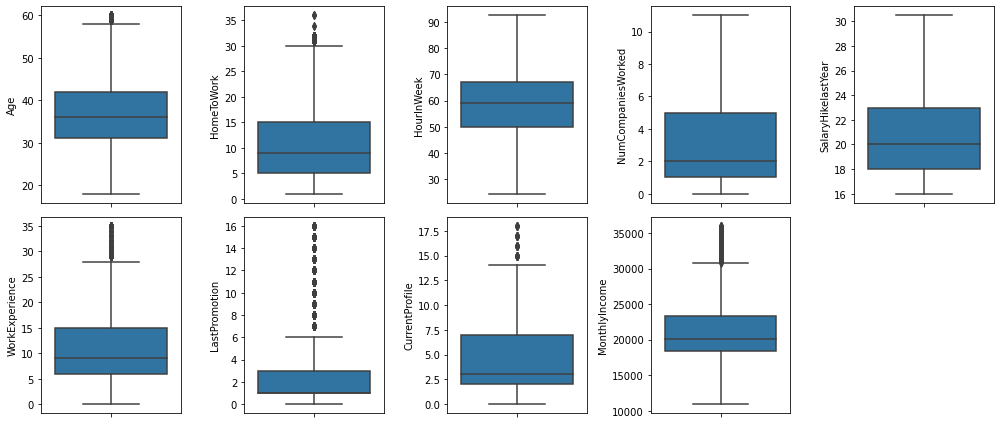

In [30]:
# keeping age and hometowork columns little bit unchanged

col = num[1:]
plt.figure(figsize=(14,6))

for i in range(len(col)):
    plt.subplot(2,5,i+1)
    sns.boxplot(y=df[col[i]])
    plt.tight_layout()

In [31]:
# encoding the categorical variables

for i in df.columns:
    if df[i].dtype == "object":
        df[i] = pd.Categorical(df[i]).codes

In [32]:
# changing datatype of few variables (convenient for analysis)

df["Attrition"] = df["Attrition"].astype("int")
df["Involvement"] = df["Involvement"].astype("int")
df["WorkLifeBalance"] = df["WorkLifeBalance"].astype("int")
df["JobSatisfaction"] = df["JobSatisfaction"].astype("int")
df["OverTime"] = df["OverTime"].astype("int")
df["ESOPs"] = df["ESOPs"].astype("int")

In [33]:
# saving the file 

# df.to_csv("clean_train_data.csv")

### SMOTE (Synthetic Minority Oversampling Technique)

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
# let's bake some artificial points

smote_sampler = SMOTE()

x = df.drop(["EmployeeID","Attrition"], axis=1)
y = df["Attrition"]

x_new, y_new = smote_sampler.fit_resample(x,y)

In [36]:
# checking the new value

y_new.value_counts()

0    3735
1    3735
Name: Attrition, dtype: int64

In [46]:
# saving the oversampled data as smote_train_data

smote_data = pd.concat([x_new,y_new], axis=1)
smote_data.to_csv("smote_train_data.csv")

In [45]:
smote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 7470 non-null   float64
 1   TravelProfile       7470 non-null   int8   
 2   Department          7470 non-null   int8   
 3   HomeToWork          7470 non-null   float64
 4   EducationField      7470 non-null   int8   
 5   Gender              7470 non-null   int8   
 6   HourlnWeek          7470 non-null   float64
 7   Involvement         7470 non-null   int32  
 8   WorkLifeBalance     7470 non-null   int32  
 9   Designation         7470 non-null   int8   
 10  JobSatisfaction     7470 non-null   int32  
 11  ESOPs               7470 non-null   int32  
 12  NumCompaniesWorked  7470 non-null   float64
 13  OverTime            7470 non-null   int32  
 14  SalaryHikelastYear  7470 non-null   float64
 15  WorkExperience      7470 non-null   float64
 16  LastPr